# Decision Variables Comparison: MATLAB vs HDF5

This notebook compares log-odds decision variables from the MATLAB DVs file with GLM-extracted decision variables from the processed HDF5 file for session A324 2023-07-27, showing only the first 240 trials.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.io import loadmat
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
# Data paths
MATLAB_FILE = Path("../../data/raw/A324/2023-07-27/DVs_A324_2023_07_27.mat")
HDF5_FILE = Path("../../data/processed/A324/2023-07-27/A324_2023-07-27_session_data.h5")

print(f"MATLAB file exists: {MATLAB_FILE.exists()}")
print(f"HDF5 file exists: {HDF5_FILE.exists()}")

MATLAB file exists: True
HDF5 file exists: True


In [3]:
def load_session_data(filepath):
    """
    Load all data from HDF5 file using the same function as in decision_variables_extraction_v003.
    
    Parameters:
    - filepath: HDF5 file path
    
    Returns:
    - Dictionary with all loaded data
    """
    with pd.HDFStore(filepath, mode='r') as store:
        trial_df = store.get('trials')
        click_df = store.get('clicks')
        dv_df = store.get('decision_variables')
        
        # Reconstruct neural data
        neural_flat = store.get('neural_data').values
        neural_shape = store.get('neural_data_shape')['shape'].iloc[0]
        neural_data = neural_flat.reshape(neural_shape)
        
        # Load metadata and parse JSON
        metadata_df = store.get('metadata')
        metadata = metadata_df.iloc[0].to_dict()

        # Parse the JSON string back to dictionary
        if 'analysis_params' in metadata and isinstance(metadata['analysis_params'], str):
            metadata['analysis_params'] = json.loads(metadata['analysis_params'])
        if 'data_shapes' in metadata and isinstance(metadata['data_shapes'], str):
            metadata['data_shapes'] = json.loads(metadata['data_shapes'])

    return {
        'trial_df': trial_df,
        'click_df': click_df, 
        'dv_df': dv_df,
        'neural_data': neural_data,
        'metadata': metadata
    }

print("Data loading function defined")

Data loading function defined


In [4]:
# Load MATLAB data
print("Loading MATLAB file...")
mat_data = loadmat(MATLAB_FILE)

# Print available keys for debugging
available_keys = [k for k in mat_data.keys() if not k.startswith('__')]
print(f"Available keys: {available_keys[:10]}...")  # Show first 10 keys

# Extract log-odds data
log_odds = None
if 'log_odds' in mat_data:
    log_odds = mat_data['log_odds']
    print(f"Found log_odds with shape: {log_odds.shape}")
elif 'log_odds_same_lambda' in mat_data:
    log_odds = mat_data['log_odds_same_lambda']
    print(f"Found log_odds_same_lambda with shape: {log_odds.shape}")

# Limit to first 240 trials
if log_odds is not None and log_odds.shape[1] > 240:
    log_odds = log_odds[:, :240]
    print(f"Limited to first 240 trials")
    
print(f"Final log_odds shape: {log_odds.shape if log_odds is not None else 'None'}")

Loading MATLAB file...
Available keys: ['Y', 'Y_hat', 'Y_hat_null', 'proj', 'eta', 'proj_same_lambda', 'eta_same_lambda', 'Y_hat_same_lambda', 'cvfit', 'beta']...
Found log_odds with shape: (752, 20)
Final log_odds shape: (752, 20)


In [10]:
mat_data["Trials"]

array([[(array([[1.501],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               [1.5  ],
               

In [ ]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'Y_hat', 'Y_hat_null', 'proj', 'eta', 'proj_same_lambda', 'eta_same_lambda', 'Y_hat_same_lambda', 'cvfit', 'beta', 'metrics', 'beta_same_lambda', 'bin_params', 'family', 'log_odds_same_lambda', 'DV_same_lambda', 'log_odds', 'DV', 'mean_AP', 'mean_DV', 'mean_ML', 'pca_loadings', 'Trials', 'None', 'split', 'n_units', 'params', '__function_workspace__'])

In [15]:
mat_data["log_odds"]

array([[-0.62564063, -0.4918899 ,  0.30429292, ...,         nan,
                nan,         nan],
       [ 0.32257447,  0.2928552 ,  0.678928  , ..., -3.0045362 ,
        -2.8390753 ,         nan],
       [-0.06855315, -0.78452986, -0.15111543, ...,  0.8971706 ,
         2.2206519 ,  2.42387   ],
       ...,
       [ 0.49692416,  1.660043  ,  2.3002167 , ...,  4.2229614 ,
         6.08471   ,  4.7491207 ],
       [ 1.2801652 ,  2.6938126 ,  2.5025294 , ...,  2.471315  ,
         3.2804961 ,  3.387971  ],
       [ 1.617899  ,  3.1684768 ,  2.4398272 , ...,  3.876502  ,
         3.7586937 ,  3.273201  ]], shape=(752, 20), dtype=float32)

In [12]:
loaded_data["trial_df"]

,trial_id,original_trial_num,choice,rewarded,violated,cpoke_in,cpoke_out,clicks_on,first_click,last_click,trial_duration,click_duration,time_to_first_click,decision_time,n_left_clicks,n_right_clicks,total_clicks,click_rate,click_asymmetry
0,0,0,1,True,False,721.903683,723.568688,723.090688,723.110873,723.399353,1.665005,0.288480,0.020185,0.169335,1,1,2,6.932890,0.0
1,1,1,0,True,False,732.202187,733.809683,732.840688,732.873203,733.594403,1.607496,0.721200,0.032515,0.215280,1,1,2,2.773156,0.0
2,2,2,1,False,False,741.017189,742.623683,741.597183,741.613853,742.461263,1.606494,0.847410,0.016670,0.162420,1,1,2,2.360133,0.0
3,3,4,0,True,False,753.100692,754.823192,754.372688,754.375473,754.588828,1.722500,0.213355,0.002785,0.234364,1,1,2,9.374048,0.0
4,4,6,0,True,False,768.054183,769.721683,768.592700,768.598540,769.542110,1.667500,0.943570,0.005840,0.179573,1,1,2,2.119610,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,769,939,1,False,False,11385.981183,11387.546689,11386.535189,11386.549724,11387.478269,1.565506,0.928545,0.014535,0.068420,1,1,2,2.153907,0.0
770,770,940,1,True,False,11394.948692,11396.635187,11396.179186,11396.202511,11396.400841,1.686495,0.198330,0.023325,0.234346,1,1,2,10.084203,0.0
771,771,941,1,True,False,11406.273683,11407.939183,11406.925186,11406.966281,11407.687481,1.665500,0.721200,0.041095,0.251702,1,1,2,2.773156,0.0
772,772,942,1,True,False,11460.463683,11462.281192,11461.104185,11461.113125,11461.945510,1.817509,0.832385,0.008940,0.335682,1,1,2,2.402734,0.0


In [5]:
# Load HDF5 data
print("Loading HDF5 file...")
loaded_data = load_session_data(HDF5_FILE)

# Extract the DataFrames we need
dv_df = loaded_data['dv_df']
trial_df = loaded_data['trial_df']

# Merge to get original trial numbers
dv_with_orig = dv_df.merge(trial_df[['trial_id', 'original_trial_num']], on='trial_id')

# Filter to first 240 trials based on original trial numbers
hdf5_data = dv_with_orig[dv_with_orig['original_trial_num'] <= 240].copy()

print(f"Loaded {len(hdf5_data)} timepoints for {hdf5_data['trial_id'].nunique()} trials")
print(f"Original trial range: {hdf5_data['original_trial_num'].min()} to {hdf5_data['original_trial_num'].max()}")
print(f"HDF5 data shape: {hdf5_data.shape}")

Loading HDF5 file...
Loaded 4114 timepoints for 187 trials
Original trial range: 0 to 240
HDF5 data shape: (4114, 12)


ValueError: x and y must have same first dimension, but have shapes (22,) and (752,)

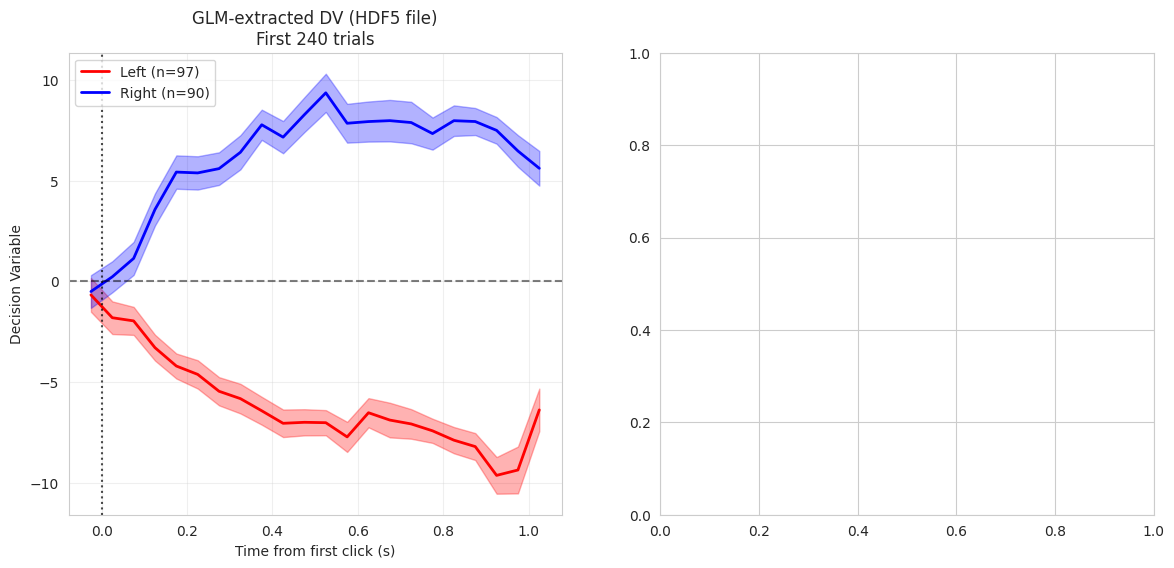

In [6]:
# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: HDF5 Decision Variables (from GLM)
# Separate by choice
left_trials = hdf5_data[hdf5_data['choice'] == 0]
right_trials = hdf5_data[hdf5_data['choice'] == 1]

# Calculate mean trajectories
left_mean = left_trials.groupby('time_bin')['decision_variable'].agg(['mean', 'sem'])
right_mean = right_trials.groupby('time_bin')['decision_variable'].agg(['mean', 'sem'])

# Plot HDF5 data
ax1.plot(left_mean.index, left_mean['mean'], 'r-', 
         label=f'Left (n={left_trials["trial_id"].nunique()})', linewidth=2)
ax1.fill_between(left_mean.index, 
                 left_mean['mean'] - left_mean['sem'], 
                 left_mean['mean'] + left_mean['sem'], 
                 alpha=0.3, color='red')

ax1.plot(right_mean.index, right_mean['mean'], 'b-', 
         label=f'Right (n={right_trials["trial_id"].nunique()})', linewidth=2)
ax1.fill_between(right_mean.index, 
                 right_mean['mean'] - right_mean['sem'], 
                 right_mean['mean'] + right_mean['sem'], 
                 alpha=0.3, color='blue')

ax1.axhline(0, color='black', linestyle='--', alpha=0.5)
ax1.axvline(0, color='black', linestyle=':', alpha=0.7)
ax1.set_xlabel('Time from first click (s)')
ax1.set_ylabel('Decision Variable')
ax1.set_title('GLM-extracted DV (HDF5 file)\nFirst 240 trials')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: MATLAB Log-Odds
if log_odds is not None:
    # log_odds should be time_bins x trials
    # Create time axis (assuming same time bins as HDF5 data)
    time_bins = sorted(hdf5_data['time_bin'].unique())
    
    # Calculate mean across trials
    mean_log_odds = np.nanmean(log_odds, axis=1)
    sem_log_odds = np.nanstd(log_odds, axis=1) / np.sqrt(np.sum(~np.isnan(log_odds), axis=1))
    
    ax2.plot(time_bins[:len(mean_log_odds)], mean_log_odds, 'g-', 
            label=f'Log-odds (n={log_odds.shape[1]} trials)', linewidth=2)
    ax2.fill_between(time_bins[:len(mean_log_odds)], 
                    mean_log_odds - sem_log_odds, 
                    mean_log_odds + sem_log_odds, 
                    alpha=0.3, color='green')
    
    ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
    ax2.axvline(0, color='black', linestyle=':', alpha=0.7)
    ax2.set_xlabel('Time from first click (s)')
    ax2.set_ylabel('Log-Odds')
    ax2.set_title('MATLAB Log-Odds (DVs file)\nFirst 240 trials')
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'MATLAB data not available', 
            ha='center', va='center', transform=ax2.transAxes)

# Overall title
fig.suptitle('Decision Variable Comparison: GLM-extracted vs MATLAB Log-Odds\nA324 Session 2023-07-27 (First 240 trials)', 
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Comparison plot created!")

In [7]:
# Data summary
print("=" * 50)
print("DATA SUMMARY")
print("=" * 50)

print("\nMATLAB Log-Odds Data:")
if log_odds is not None:
    print(f"  Shape: {log_odds.shape} (time_bins x trials)")
    print(f"  Mean: {np.nanmean(log_odds):.3f}")
    print(f"  Std: {np.nanstd(log_odds):.3f}")
    print(f"  Range: [{np.nanmin(log_odds):.3f}, {np.nanmax(log_odds):.3f}]")
else:
    print("  No log-odds data found")

print("\nHDF5 Decision Variables:")
print(f"  Shape: {hdf5_data.shape}")
print(f"  Unique trials: {hdf5_data['trial_id'].nunique()}")
print(f"  Time bins: {hdf5_data['time_bin'].nunique()}")
print(f"  Mean DV: {hdf5_data['decision_variable'].mean():.3f}")
print(f"  Std DV: {hdf5_data['decision_variable'].std():.3f}")
print(f"  Choice distribution: Left={sum(hdf5_data.groupby('trial_id')['choice'].first() == 0)}, Right={sum(hdf5_data.groupby('trial_id')['choice'].first() == 1)}")

print("\nTime bin info:")
time_range = hdf5_data['time_bin'].agg(['min', 'max'])
print(f"  Time range: {time_range['min']:.3f} to {time_range['max']:.3f} seconds")
print(f"  Number of time bins: {hdf5_data['time_bin'].nunique()}")

DATA SUMMARY

MATLAB Log-Odds Data:
  Shape: (752, 20) (time_bins x trials)
  Mean: 0.069
  Std: 3.379
  Range: [-8.909, 11.557]

HDF5 Decision Variables:
  Shape: (4114, 12)
  Unique trials: 187
  Time bins: 22
  Mean DV: -0.241
  Std DV: 9.300
  Choice distribution: Left=97, Right=90

Time bin info:
  Time range: -0.025 to 1.025 seconds
  Number of time bins: 22
